### Clustering and Classification


In [47]:
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier




In [31]:
train = pd.read_csv('1census_income_train.csv')
test = pd.read_csv('1census_income_test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   99278 non-null   object 
 2   ADTIND    199523 non-null  int64  
 3   AGI       199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    12580 non-null   object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    98839 non-null   object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    19064 non-null   object 
 14  AUNTYPE   6070 non-null    object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

In [32]:
threshold = len(train) * 0.7  # 70% of the number of rows in train DataFrame

# Drop columns with less than the threshold number of non-null values
train = train.dropna(thresh=threshold, axis=1)


In [33]:
threshold = len(test) * 0.7  # 70% of the number of rows in train DataFrame

test = test.dropna(thresh=threshold, axis=1)


In [6]:
test.head(10)

,AAGE,ADTIND,AGI,AHGA,AHRSPAY,AMARITL,AMJIND,ARACE,AREORGN,ASEX,...,MIGSAME,NOEMP,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETYN,WKSWORK,TAXINC
0,38,6,36,1st 2nd 3rd or 4th grade,0,Married-civilian spouse present,Manufacturing-durable goods,White,Mexican (Mexicano),Female,...,under 1 year old,4,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,2,12,0
1,44,37,12,Associates degree-occup /vocational,0,Married-civilian spouse present,Business and repair services,White,All other,Female,...,under 1 year old,1,United-States,United-States,United-States,Native- Born in the United States,0,2,26,0
2,2,0,0,Children,0,Never married,or children,White,Mexican-American,Male,...,under 1 year old,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,0
3,35,29,3,High school graduate,0,Divorced,Transportation,White,All other,Female,...,Yes,5,United-States,United-States,United-States,Native- Born in the United States,2,2,52,0
4,49,4,34,High school graduate,0,Divorced,Construction,White,All other,Male,...,under 1 year old,4,United-States,United-States,United-States,Native- Born in the United States,0,2,50,0
5,13,0,0,Children,0,Never married,or children,White,All other,Male,...,Yes,0,Germany,United-States,United-States,Native- Born in the United States,0,0,0,0
6,1,0,0,Children,0,Never married,or children,White,Mexican-American,Female,...,Yes,0,Mexico,United-States,United-States,Native- Born in the United States,0,0,0,0
7,61,0,0,High school graduate,0,Married-civilian spouse present,or children,White,All other,Female,...,under 1 year old,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,0
8,38,45,12,Masters degree(MA MS MEng MEd MSW MBA),0,Married-civilian spouse present,Other professional services,Black,All other,Male,...,Yes,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,0
9,7,0,0,Children,0,Never married,or children,White,All other,Female,...,Yes,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,0


In [34]:
train = train.rename(columns=lambda x: x.replace(' ', ''))
test = test.rename(columns=lambda x: x.replace(' ', ''))


In [35]:
train = train[['AAGE', 'AHGA', 'AMARITL', 'AMJIND', 'ARACE', 'ASEX','FILESTAT', 'PRCITSHP', 'WKSWORK', 'TAXINC']]

In [36]:
test = test[['AAGE', 'AHGA', 'AMARITL', 'AMJIND', 'ARACE', 'ASEX','FILESTAT', 'PRCITSHP', 'WKSWORK', 'TAXINC']]

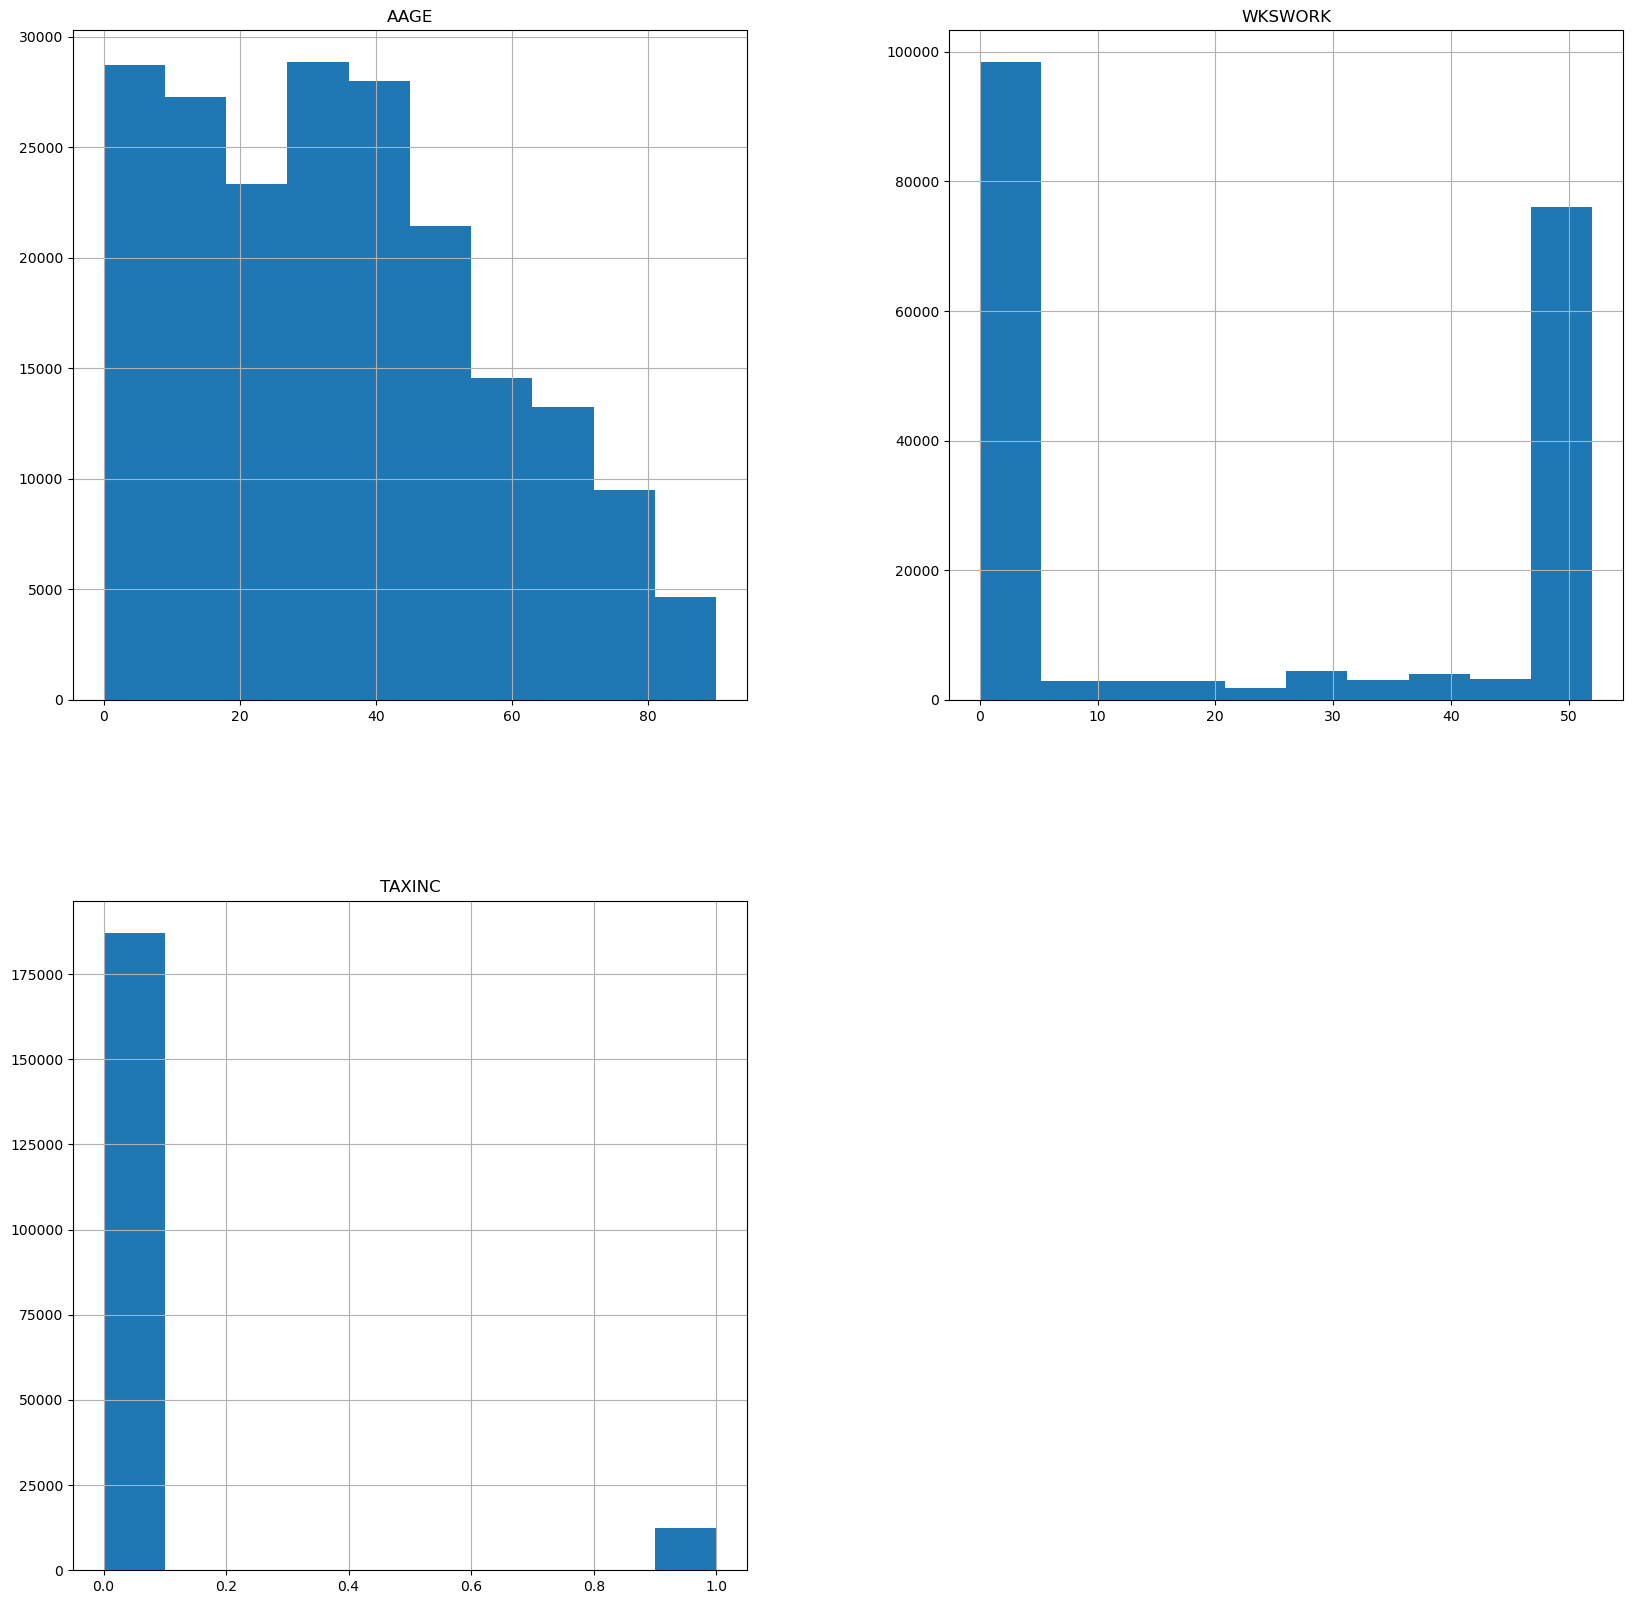

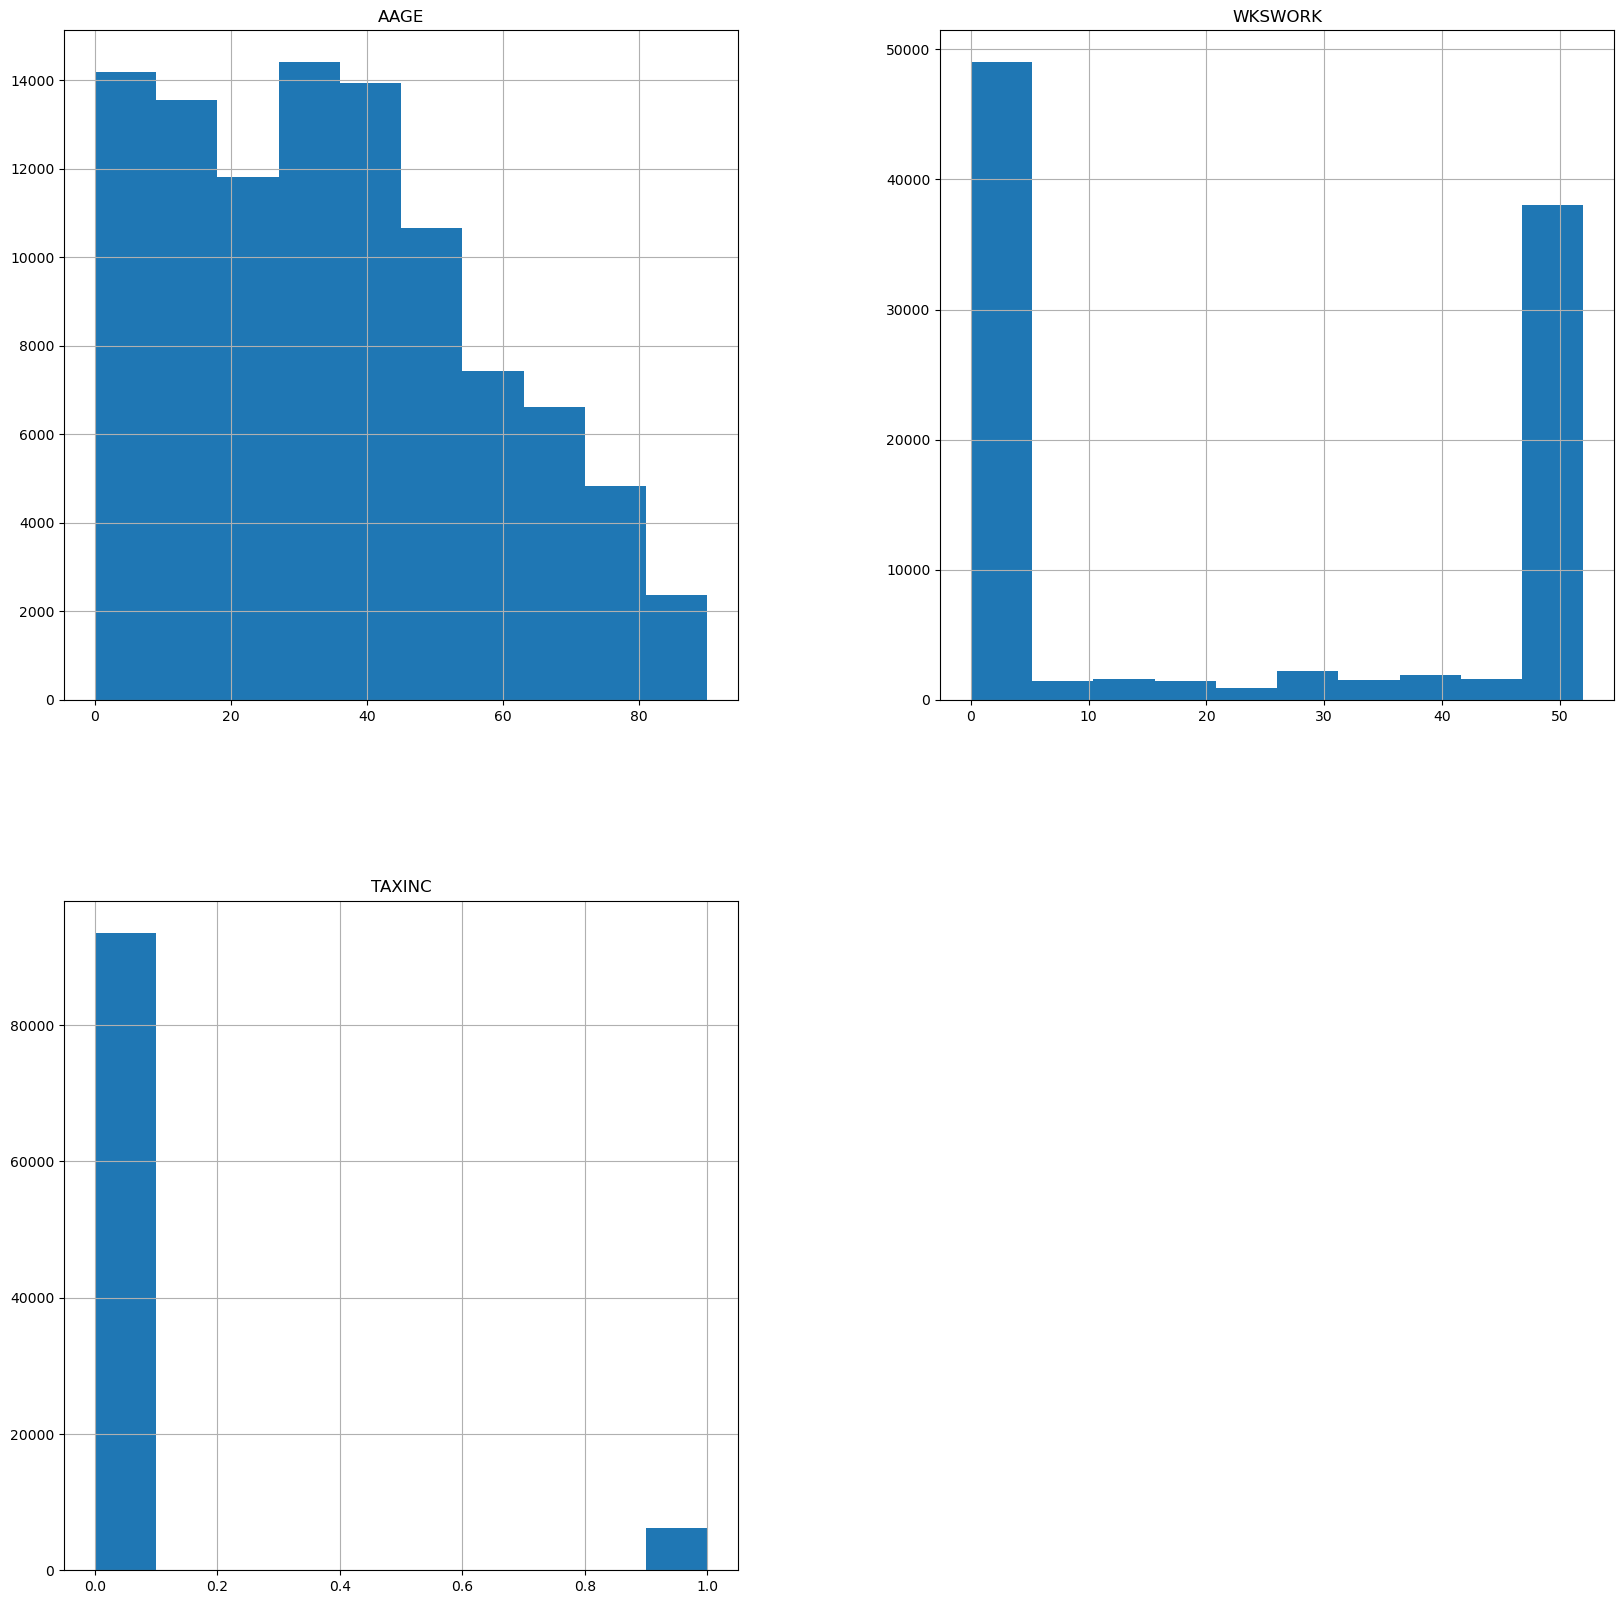

In [10]:
# plot the histograms for all columns in the train dataset
train.hist(figsize=(20,20))
plt.show()

# plot the histograms for all columns in the test dataset
test.hist(figsize=(20,20))
plt.show()

In [27]:
test.head(10)

,AAGE,AHGA,AMARITL,AMJIND,ARACE,ASEX,FILESTAT,PRCITSHP,WKSWORK,TAXINC
0,38,3,2,11,4,0,3,0,12,0
1,44,8,2,3,4,0,2,4,26,0
2,2,10,4,0,4,1,4,4,0,0
3,35,12,0,21,4,0,0,4,52,0
4,49,12,0,5,4,1,5,4,50,0
5,13,10,4,0,4,1,4,4,0,0
6,1,10,4,0,4,0,4,4,0,0
7,61,12,2,0,4,0,2,4,0,0
8,38,14,2,15,2,1,2,4,52,0
9,7,10,4,0,4,0,4,4,0,0


In [37]:
import statsmodels.api as sm

# define categorical columns
categorical_cols = ['AHGA', 'AMARITL', 'AMJIND', 'ARACE', 'ASEX', 'FILESTAT', 'PRCITSHP', 'WKSWORK']

# create an encoder
le = LabelEncoder()

# fit and transform the categorical columns in the train dataset
train[categorical_cols] = train[categorical_cols].apply(lambda x: le.fit_transform(x))
test[categorical_cols] = test[categorical_cols].apply(lambda x: le.fit_transform(x))

# use the fitted encoder to transform the categorical columns in the test dataset
test[categorical_cols] = test[categorical_cols].apply(lambda x: le.transform(x))
train[categorical_cols] = train[categorical_cols].apply(lambda x: le.transform(x))


In [38]:
test.head(10)

,AAGE,AHGA,AMARITL,AMJIND,ARACE,ASEX,FILESTAT,PRCITSHP,WKSWORK,TAXINC
0,38,3,2,11,4,0,3,0,12,0
1,44,8,2,3,4,0,2,4,26,0
2,2,10,4,0,4,1,4,4,0,0
3,35,12,0,21,4,0,0,4,52,0
4,49,12,0,5,4,1,5,4,50,0
5,13,10,4,0,4,1,4,4,0,0
6,1,10,4,0,4,0,4,4,0,0
7,61,12,2,0,4,0,2,4,0,0
8,38,14,2,15,2,1,2,4,52,0
9,7,10,4,0,4,0,4,4,0,0


In [39]:
X_train = train.drop('TAXINC', axis=1)
y_train = train['TAXINC']

X_test = test.drop('TAXINC', axis=1)
y_test = test['TAXINC']


In [41]:
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = logreg.predict(X_test)

#accuracy of the model on the test data
accuracy_test = logreg.score(X_test, y_test)
print("Accuracy of Test:", accuracy_test)
accuracy_train = logreg.score(X_train, y_train)
print("Accuracy of Train:", accuracy_train)

Accuracy of Test: 0.9375814438363305
Accuracy of Train: 0.9375911549044471


/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

logreg_grid = GridSearchCV(logreg, param_grid=param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

print("Best hyperparameters:", logreg_grid.best_params_)
print("Best accuracy score:", logreg_grid.best_score_)

/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/ana

/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kaylakight/opt/ana

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score: 0.9378417521686178


In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ",accuracy)

Random Forest Accuracy:  0.9367294160101041


In [49]:
rf = RandomForestClassifier()

# specify hyperparameters to tune
param_grid = {'n_estimators': [100, 300, 500],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 50, 100],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2]}

rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_train, y_train)

print("Best hyperparameters:", rf_grid.best_params_)
print("Best accuracy score:", rf_grid.best_score_)


Best hyperparameters: {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score: 0.9449236380569852


In [45]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBOOST Accuracy: ", accuracy)
print("XGBOOST Precision: ", precision)
print("XGBOOST Recall: ", recall)
print("XGBOOST F1-score: ", f1)

XGBOOST Accuracy:  0.9423728473767566
XGBOOST Precision:  0.6122239342578326
XGBOOST Recall:  0.19269317814419656
XGBOOST F1-score:  0.2931267674904709


In [54]:
# create an XGBoost model
xgb = XGBClassifier()

param_dist = {'max_depth': [3, 4, 5, 6, 7],
              'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'n_estimators': [50, 100, 200, 300],
              'colsample_bytree': [0.5, 0.7, 1]}
n_iter_search = 50

xgb_random = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=n_iter_search, cv=5, random_state=42, n_jobs=-1)
xgb_random.fit(X_train, y_train)

print("Best hyperparameters:", xgb_random.best_params_)


Best hyperparameters: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [57]:
xgb_best = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, colsample_bytree=0.5)

print("Best accuracy score:", xgb_random.best_score_)




Best accuracy score: 0.9462668400653236


In [51]:
logreg_tuned = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

# fit the model to the training data
logreg_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred = logreg_tuned.predict(X_test)

# calculate accuracy of the model on the test data
accuracy_test = logreg_tuned.score(X_test, y_test)
print("Accuracy of Trained Log Test:", accuracy_test)

# calculate accuracy of the model on the training data
accuracy_train = logreg_tuned.score(X_train, y_train)
print("Accuracy of Trained Log Train:", accuracy_train)

Accuracy of Trained Log Test: 0.9379122311100418
Accuracy of Trained Log Train: 0.937836740626394


In [59]:
coefficients = logreg_tuned.coef_

abs_coefs = abs(coefficients)

# get the indices of the top five features
top_five_indices = np.argsort(abs_coefs)[0][-5:]

# get the names of the top five features
top_five_features = X_train.columns[top_five_indices]

print("Top five features:", top_five_features)


Top five features: Index(['WKSWORK', 'ARACE', 'FILESTAT', 'AMARITL', 'ASEX'], dtype='object')


In [60]:
# train the XGBoost model with the optimized hyperparameters
xgb_tuned = XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300)

xgb_tuned.fit(X_train, y_train)

importance_scores = xgb_tuned.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, importance_scores))

# sort the features by importance scores in descending order and extract the top five
top_five_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# print the top five features and their importance scores
for feature, score in top_five_features:
    print(feature, score)


ASEX 0.26876417
AHGA 0.21077575
WKSWORK 0.11149685
AMJIND 0.11143258
AAGE 0.107531376


Logistic regression had weeks worked as the most important feature while the XGBoost model has sex as the most important feature. 